{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* List 2-3 fundamental differences between a geographic and a projected `CRS`.
* Describe the elements of each zone within Universal Trans Mercator (UTM) CRS and Geographic (WGS84) CRS.

</div>

## Geographic vs Projected CRS

On the previous page, you explored the basic concept of a coordinate reference system. You looked at two different types of Coordinate Reference Systems:

1. **Geographic coordinate systems:** coordinate systems that span the entire
globe (e.g. latitude / longitude).
2. **Projected coordinate Systems:** coordinate systems that are localized to
minimize visual distortion in a particular region (e.g. Robinson, UTM, State Plane)

On this page, you will learn about the differences between these CRSs in more detail.

As you discussed in the previous lesson, each `CRS` is optimized to best represent the:

* shape and/or
* scale / distance and/or
* area

of features in a dataset. There is not a single CRS that does a great job at optimizing all three elements: shape, distance AND area. Some CRSs are optimized for shape, some are optimized for distance and
some are optimized for area. Some CRSs are also optimized for particular regions - for instance the United States, or Europe.

## Intro to Geographic Coordinate Reference Systems

Geographic coordinate systems (which are often but not always in decimal degree
units) are often optimal when you need to locate places on the Earth. Or when
you need to create global maps. However, latitude and longitude
locations are not located using uniform measurement units. Thus, geographic
CRSs are not ideal for measuring distance. This is why other projected `CRS`
have been developed.

<figure>
	<a href="{{ site.baseurl }}/images/earth-analytics/spatial-data/latitude-longitude-globe-ESRI.gif">
	<img src="{{ site.baseurl }}/images/earth-analytics/spatial-data/latitude-longitude-globe-ESRI.gif" alt="Graphic showing lat long as it's placed over the globe by ESRI."></a>
	<figcaption>A geographic coordinate system locates latitude and longitude
	location using angles. Thus the spacing of each line of latitude moving north
	and south is not uniform.
	Source: ESRI
	</figcaption>
</figure>

## The Structure of a Geographic CRS

A geographic CRS uses a grid that wraps around the entire globe.
This means that each point on the globe is defined using the SAME coordinate
system and the same units as defined within that particular geographic CRS.
Geographic coordinate reference systems are best for global analysis however it
is important to remember that distance is distorted using a geographic lat / long
`CRS`.

The **geographic WGS84 lat/long** `CRS` has an origin - (0,0) -
located at the intersection of the
Equator (0° latitude) and Prime Meridian (0° longitude) on the globe.

You will review what data projected in a geographic CRS look like.


In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et
import seaborn as sns

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

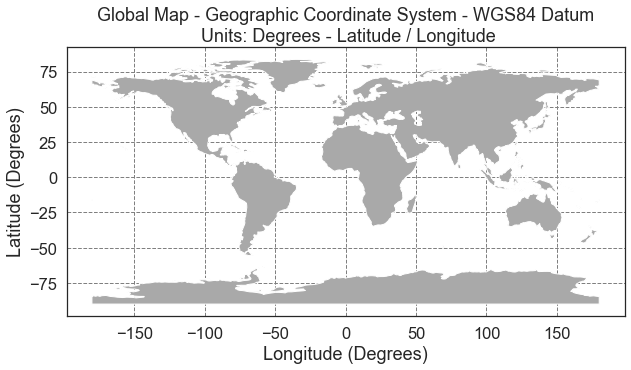

In [2]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

# Read grat shapefile
worldGrat30_path = os.path.join("data", "spatial-vector-lidar", "global", 
                                "ne_110m_graticules_all", "ne_110m_graticules_30.shp")
worldGrat30 = gpd.read_file(worldGrat30_path) 

# Import box
wgs84Box_path = os.path.join("data", "spatial-vector-lidar", "global", 
                             "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
wgs84Box = gpd.read_file(wgs84Box_path) 

# Plot data
ax = worldBound.plot(figsize=(10, 5), color='darkgrey')
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')


<i class="fa fa-star"></i> **Data Note:** The distance between the 2 degrees of
longitude at the equator (0°) is ~ 69 miles. The distance between 2 degrees of
longitude at 40°N (or S) is only 53 miles. This difference in actual distance relative to
"distance" between the actual parallels and meridians demonstrates how distance
calculations will be less accurate when using geographic CRSs
{: .notice--warning }


## Projected Coordinate Reference Systems

As you learned above, geographic coordinate systems are ideal for creating
global maps. However, they are prone to error when quantifying distance. In contrast, various spatial projections have evolved that can be used to more accurately capture distance, shape and/or area.

### What is a Spatial Projection
Spatial projection refers to the mathematical calculations
performed to flatten the 3D data onto a 2D plane (your computer screen
or a paper map). Projecting data from a round surface onto a flat surface, results
in visual modifications to the data when plotted on a map. Some areas are stretched
and some are compressed. You can see this distortion when you look at a map
of the entire globe.

The mathematical calculations used in spatial projections are designed to
optimize the relative size and shape of a particular region on the globe.

<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/spatial-projection-transformations-crs.png">
    <img src="{{ site.url }}/images//earth-analytics/spatial-data/spatial-projection-transformations-crs.png" alt="projection surfaces graphic">
    </a>
    <figcaption>The 3-dimensional globe must be transformed to create a flat
    2-dimensional map. How that transformation or **projection** occurs changes
    the appearance of the final map and the relative size of objects in
    different parts of the map.
    Source: CA Furuti, progonos.com/furuti</figcaption>
</figure>


### About UTM

The **Universal Transverse Mercator** (UTM) system is a commonly used projected
coordinate reference system. UTM subdivides the globe into zones,
numbered 0-60 (equivalent to longitude) and regions (north and south)


<i class="fa fa-star"></i> **Data Note:** UTM zones are also defined using bands,
lettered C-X (equivalent to latitude) however, the band designation is often
dropped as it isn't essential to specifying the location.
{: .notice--warning }

While UTM zones span the entire globe, UTM uses a regional projection and
associated coordinate system. The coordinate system grid for each
zone is projected individually using the **Mercator projection**.

The origin (0,0) for each UTM zone and associated region is located at the
intersection of the equator and a location, 500,000 meters east of the central
meridian of each zone. The origin location is placed outside of the boundary of
the UTM zone, to avoid negative Easting numbers.


<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/utm-zone-characteristics.png">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/utm-zone-characteristics.png" alt="utm zone characteristics">
    </a>
    <figcaption>The 0,0 origin of each UTM zone is located in the <strong>Bottom left</strong> hand corner (south west) of the zone - exactly 500,000 m EAST from the central meridian of the zone.
    Source: Penn State E-education</figcaption>
</figure>


<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/800px-utm-zones.jpg">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/800px-utm-zones.jpg" alt="Nasa image showing the UTM x and y zones">
    </a>
    <figcaption>The gridded UTM coordinate system across the globe.
    Source: NASA Earth Observatory</figcaption>
</figure>

### Understand UTM Coordinates

Compare coordinates for one location, but saved in two different CRSs to
better understand what this looks like. The coordinates for Boulder, Colorado in
UTM are:

`UTM Zone 13N easting: 476,911.31m, northing: 4,429,455.35`

Remember that N denotes that it is in the Northern hemisphere on the Earth.

Plot this coordinate on a map.

In [3]:
boulder_df = np.array([[476911.31,  4429455.35]])
geometry = [Point(xy) for xy in boulder_df]

boulder_loc = gpd.GeoDataFrame(geometry,
                               columns=['geometry'],
                               crs={'init': 'epsg:2957'})

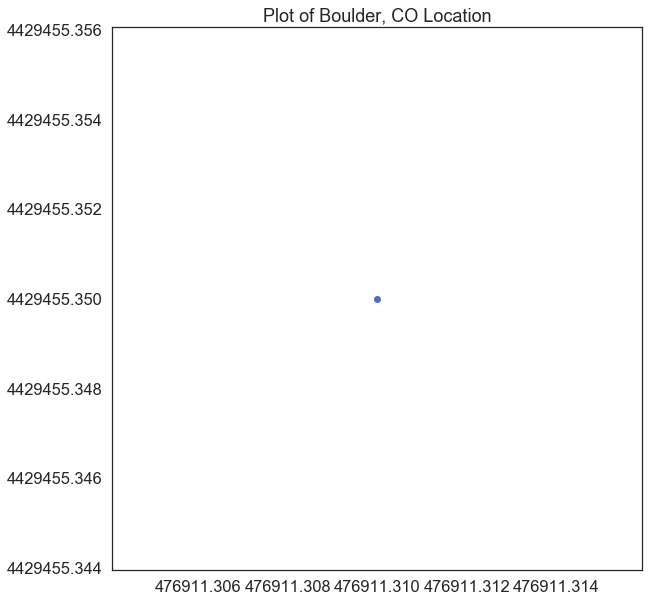

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
boulder_loc.plot(ax=ax)
ax.set_title("Plot of Boulder, CO Location")

# Turn off scientific notation
plt.ticklabel_format(useOffset=False)
plt.show()

In [5]:
# View crs
boulder_loc.crs

{'init': 'epsg:2957'}

Note the projection of your data in UTM is [EPSG code 2957](http://spatialreference.org/ref/epsg/2957/)

If you spatially project your data into a geographic coordinate refence system,
notice how your new coordinates are different - yet they still represent the same
location.

In [6]:
# Reproject the data to WGS84
boulder_df_geog = boulder_loc.to_crs(epsg=4326)
boulder_df_geog.crs

/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:4326', 'no_defs': True}

In [7]:
# View the coordinate values of the newly reprojected data.
boulder_df_geog

,geometry
0,POINT (-105.27055 40.01498)


Now you can plot your data on top of your world map which is also in a geographic CRS.

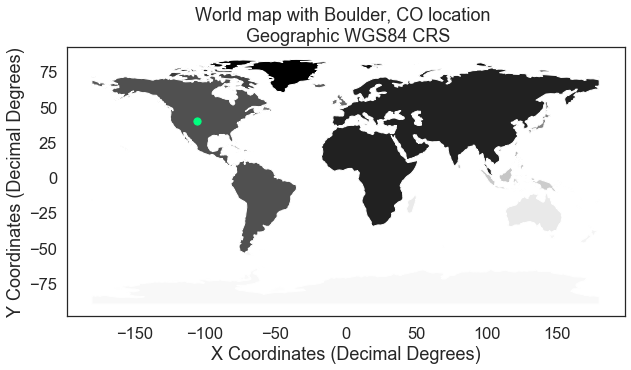

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

worldBound.plot(cmap='Greys',
                ax=ax)

ax.set(title="World map with Boulder, CO location \n Geographic WGS84 CRS",
       xlabel="X Coordinates (Decimal Degrees)",
       ylabel="Y Coordinates (Decimal Degrees)")

boulder_df_geog.plot(ax=ax,
                     markersize=52,
                     color='springgreen')
plt.show()

### Important Tips

While sometimes UTM zones in the north vs south are specified using N and S
respectively (e.g. UTM Zone 18N) other times you may see a letter as follows:
Zone 18T, 730782m Easting, 4712631m Northing vs UTM Zone 18N, 730782m, 4712631m.

<i class="fa fa-star"></i> **Data Tip:**  The UTM system doesn't apply to polar
regions (>80°N or S). Universal Polar Stereographic (UPS) coordinate system is
used in these area. This is where zones A, B and Y, Z are used if you were
wondering why they weren't in the UTM lettering system.
{: .notice--success }


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

The penn state e-education institute has a nice interactive tool that you can
use to explore utm coordinate reference systems.

<a href="https://www.e-education.psu.edu/natureofgeoinfo/sites/www.e-education.psu.edu.natureofgeoinfo/files/flash/coord_practice_utm_v06.swf" target="_blank">View UTM Interactive tool</a>

</div>


### Datum

The datum describes the vertical and horizontal reference point of the coordinate
system. The vertical datum describes the relationship between a specific ellipsoid
(the top of the earth's surface) and the center of the earth. The datum also describes
the origin (0,0) of a coordinate system.

Frequently encountered datums:

* *WGS84* -- World Geodetic System (created in) 1984.  The origin is the center of
the earth.
* *NAD27* & *NAD83* -- North American Datum 1927 and 1983,
respectively.  The origin for NAD 27 is Meades Ranch in Kansas.
* *ED50* -- European Datum 1950



> NOTE: All coordinate reference systems have a vertical and horizontal datum
which defines a "0, 0" reference point. There are two models used to define
the datum: **ellipsoid** (or spheroid): a mathematically representation of the shape of
the earth. Visit
<a href="https://en.wikipedia.org/wiki/Earth_ellipsoid" target="_blank">Wikipedia's article on the earth ellipsoid </a>  for more information and **geoid**: a
model of the earth's gravitatinal field which approximates the mean sea level
across the entire earth.  It is from this that elevation is measured. Visit
<a href="https://en.wikipedia.org/wiki/Geoid" target="_blank">Wikipedia's geoid
article </a>for more information. You will not cover these concepts in this tutorial.



### Coordinate Reference System Formats

There are numerous formats that are used to document a **CRS**. In the next tutorial
you will discuss three of the commonly encountered formats including: **Proj4**,
**WKT** (Well Known Text) and **EPSG**.


<div class="notice--info" markdown="1">

## Additional Resources

### More about the UTM CRS
* <a href="https://www.e-education.psu.edu/natureofgeoinfo/c2_p22.html" target="_blank">
Penn State E-education overview of UTM</a>
* <a href="https://www.e-education.psu.edu/natureofgeoinfo/c2_p23.html
" target="_blank">
More about UTM Zones - Penn State E-education</a>

### More about Datums
*  <a href="http://help.arcgis.com/en/arcgisdesktop/10.0/help/index.html#/Datums/003r00000008000000/" target="_blank">ESRI's ArcGIS discussion of Datums.</a>
*  <a href="https://web.archive.org/web/20200225021219/https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/OverviewCoordinateReferenceSystems.pdf" target="_blank">page 2 in M. Fraiser's CRS Overview.</a>

</div>